## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN
from sklearn import metrics

##  Loading the dataset

In [7]:
mall = pd.read_csv("DataSets\\Mall_Customers.csv")

In [8]:
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Cleaning the data

In [20]:
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [21]:
# We dont need CustomerID for clustering
mall.drop("CustomerID", axis=1)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Visualizing/Analyzing the data

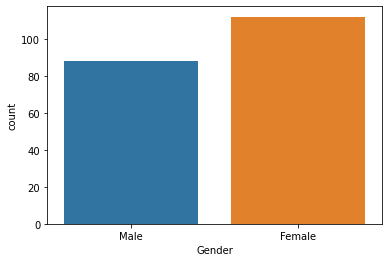

In [23]:
sns.countplot(data=mall, x=mall.Gender)
plt.show()

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

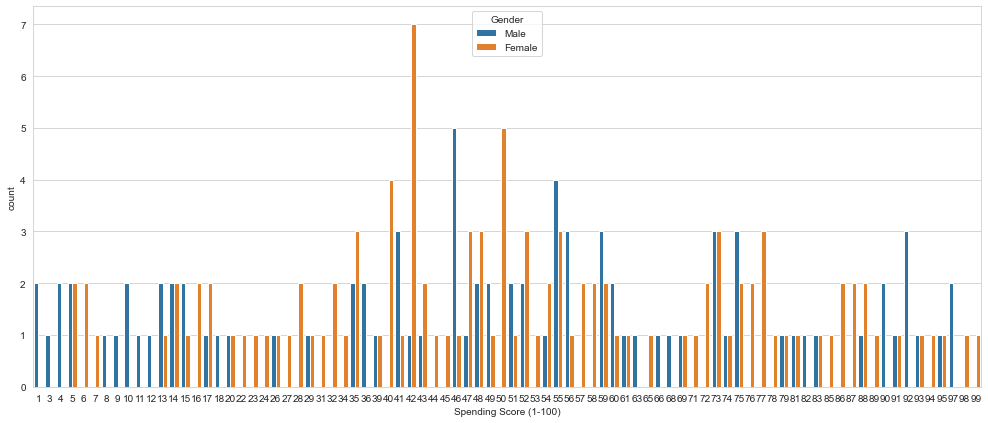

In [29]:
plt.figure(figsize = (17,7))
sns.set_style('whitegrid')
sns.countplot(x='Spending Score (1-100)', hue='Gender', data=mall, palette=sns.color_palette('tab10'))

# Females are spending more than males..

<AxesSubplot:xlabel='Age', ylabel='Count'>

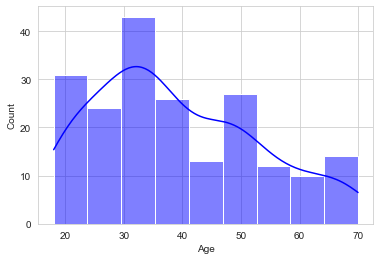

In [32]:
sns.histplot(mall.Age, kde=True, color='blue')

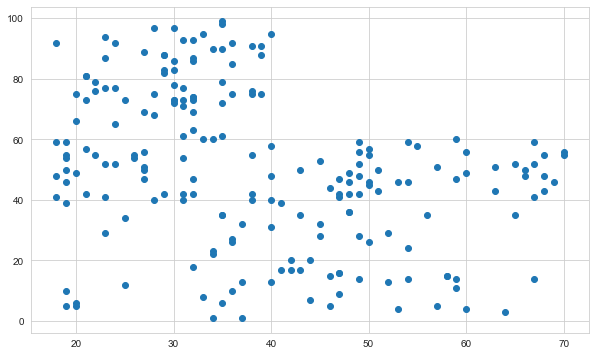

In [36]:
plt.figure(figsize = (10,6))
plt.scatter(x=mall.Age, y=mall['Spending Score (1-100)'])

## Selecting the features

In [9]:
X = mall.iloc[:, [3, 4]].values

## Finding the suitable min_sample values

In [38]:
silhouette_list = []
for i in range(1, 20):
    db_model = DBSCAN(eps=10, min_samples=i)
    db_model.fit(X)
    d_labels = db_model.labels_
    score = metrics.silhouette_score(X, d_labels)
    silhouette_list.append(score)
    

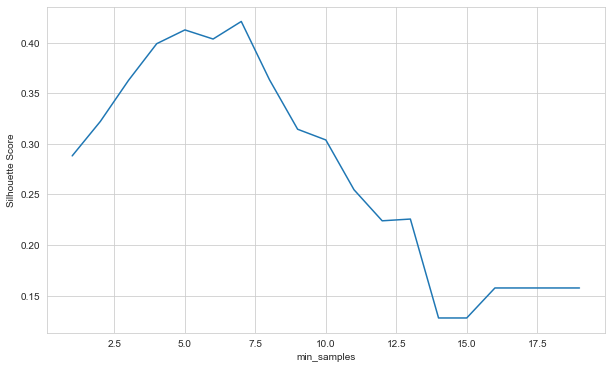

In [40]:
plt.figure(figsize = (10,6))
plt.plot(list(range(1, 20)), silhouette_list)
plt.xlabel("min_samples")
plt.ylabel("Silhouette Score")
plt.show()

In [ ]:
## Here we have high silhouette score for the min_samples being somewhere between 7 to 7.5

## Training the model

In [57]:
db_model = DBSCAN(eps=10, min_samples=7)

In [58]:
db_model.fit(X)

DBSCAN(eps=10, min_samples=7)

In [59]:
# Getting the labels
labels = db_model.labels_

In [60]:
labels

array([ 2,  1,  0,  1,  2,  1,  0, -1,  0,  1,  0, -1,  0,  1,  0,  1,  2,
        1,  2, -1,  2,  1,  0,  1,  0,  1,  2, -1,  2,  1,  0,  1,  0, -1,
        0,  1,  0,  1,  2,  1,  2, -1,  2,  2,  2,  1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1,  3,  4,  3, -1,  3, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [61]:
core_points = np.zeros_like(labels, dtype=bool)

In [62]:
core_points[db_model.core_sample_indices_] = True

In [65]:
n_clusters = len(set(labels))- (1 if -1 in labels else 0)
print(f"Number of clusters: {n_clusters}")

Number of clusters: 5


## Evaluating the model

In [66]:
print(f"Silhouette score of the model: {metrics.silhouette_score(X, labels)}")

Silhouette score of the model: 0.42084049577844984


## Visualizing the clusters

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

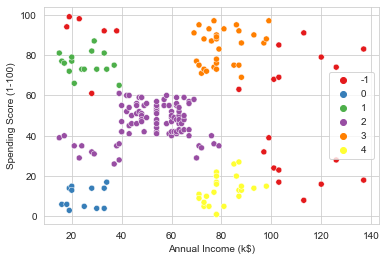

In [68]:
sns.scatterplot(x=mall['Annual Income (k$)'], y=mall['Spending Score (1-100)'], hue=labels, palette='Set1')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

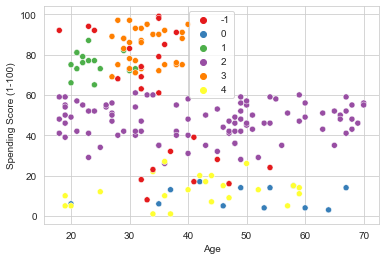

In [69]:
sns.scatterplot(x=mall['Age'], y=mall['Spending Score (1-100)'], hue=labels, palette='Set1')

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

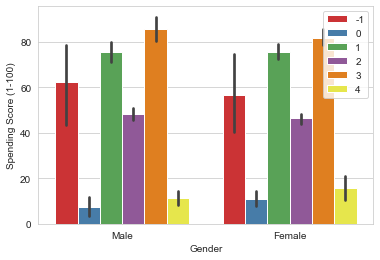

In [71]:
sns.barplot(x=mall['Gender'], y=mall['Spending Score (1-100)'], hue=labels, palette='Set1')